<a href="https://colab.research.google.com/github/Odima-dev/Data-Science-and-Machine-Learning/blob/main/FasterR_CNNandYOLO_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#  Installing Conda
!pip install -q condacolab

In [6]:
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:15
🔁 Restarting kernel...


In [1]:
# Confirming Conda Version
!which conda
!conda --version

/usr/local/bin/conda
conda 24.11.2


In [2]:
# Creating python 3.7 virtual environment
!conda create -n ml_env python=3.7 -y

Channels:
 - conda-forge
Platform: linux-64
Solving environment: - \ | done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.2
    latest version: 25.5.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local/envs/ml_env

  added / updated specs:
    - python=3.7


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.7.14  |       hbd8a1cb_0         152 KB  conda-forge
    ld_impl_linux-64-2.44      |       h1423503_1         660 KB  conda-forge
    libffi-3.4.6               |       h2dba641_1          56 KB  conda-forge
    libgcc-15.1.0              |       h767d61c_4         805 KB  conda-forge
    libgcc-ng-15.1.0           |       h69a702a_4          29 KB  conda-forge
    libgomp-15.1.0             |       h767d61c_4         437 KB  conda-forge
  

In [3]:
import os
os.system("source activate ml_env && python --version")

32512

In [5]:
# Activating virtual environment and checking version
!conda run -n ml_env python --version

Python 3.7.12



In [6]:
# Problem 1: Learning and Estimation

#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Creating my project folder
!mkdir -p "/content/drive/MyDrive/SimpsonsProject"
project_folder = "/content/drive/MyDrive/SimpsonsProject"

Mounted at /content/drive


In [8]:
%cd /content/drive/MyDrive/SimpsonsProject

/content/drive/MyDrive/SimpsonsProject


In [ ]:
# Cloning the ObjectDetection GitHub Repository
!git clone https://github.com/duckrabbits/ObjectDetection.git "{project_folder}"

fatal: destination path '/content/drive/MyDrive/SimpsonsProject' already exists and is not an empty directory.


In [ ]:
cd "{project_folder}"

/content/drive/MyDrive/SimpsonsProject


In [ ]:
#Uploading Kaggle simpsons_dataset.tar and kaggle_simpson_testset.zip Datasets
from google.colab import files
uploaded = files.upload()

Saving kaggle_simpson_testset.zip to kaggle_simpson_testset.zip
Saving simpsons_dataset.tar to simpsons_dataset.tar


In [ ]:
# Creating target directory before extraction
!mkdir -p "{project_folder}/simpsons_dataset"
!mkdir -p "{project_folder}/kaggle_simpson_testset"

In [ ]:
# Extracting the files
!tar -xvf "simpsons_dataset.tar" -C "{project_folder}/simpsons_dataset" --strip-components=1
!unzip -q "kaggle_simpson_testset.zip" -d "{project_folder}/kaggle_simpson_testset"

Streaming output truncated to the last 5000 lines.
moe_szyslak/pic_1027.jpg
moe_szyslak/pic_1028.jpg
moe_szyslak/pic_1029.jpg
moe_szyslak/pic_1030.jpg
moe_szyslak/pic_1031.jpg
moe_szyslak/pic_1032.jpg
moe_szyslak/pic_1033.jpg
moe_szyslak/pic_1034.jpg
moe_szyslak/pic_1035.jpg
moe_szyslak/pic_1036.jpg
moe_szyslak/pic_1037.jpg
moe_szyslak/pic_1038.jpg
moe_szyslak/pic_1039.jpg
moe_szyslak/pic_1040.jpg
moe_szyslak/pic_1041.jpg
moe_szyslak/pic_1042.jpg
moe_szyslak/pic_1043.jpg
moe_szyslak/pic_1044.jpg
moe_szyslak/pic_1045.jpg
moe_szyslak/pic_1046.jpg
moe_szyslak/pic_1047.jpg
moe_szyslak/pic_1048.jpg
moe_szyslak/pic_1049.jpg
moe_szyslak/pic_1050.jpg
moe_szyslak/pic_1051.jpg
moe_szyslak/pic_1052.jpg
moe_szyslak/pic_1053.jpg
moe_szyslak/pic_1054.jpg
moe_szyslak/pic_1055.jpg
moe_szyslak/pic_1056.jpg
moe_szyslak/pic_1057.jpg
moe_szyslak/pic_1058.jpg
moe_szyslak/pic_1059.jpg
moe_szyslak/pic_1060.jpg
moe_szyslak/pic_1061.jpg
moe_szyslak/pic_1062.jpg
moe_szyslak/pic_1063.jpg
moe_szyslak/pic_1064.jpg

In [ ]:
%cd "{project_folder}"

/content/drive/MyDrive/SimpsonsProject


In [ ]:
ls

annotation.txt              model/      save/                 train.py
kaggle_simpson_testset/     predict.py  simpsons_dataset/
kaggle_simpson_testset.zip  README.md   simpsons_dataset.tar


In [ ]:
!conda run -n ml_env python --version

Python 3.7.12



In [11]:
# Installing specific versions for my implementation
!conda run -n ml_env pip install tensorflow==1.14.0
!conda run -n ml_env pip install keras==2.2.5
!conda run -n ml_env pip install opencv-python==4.1.2.30
!conda run -n ml_env pip install pillow==6.2.2
!conda run -n ml_env pip install matplotlib==3.1.3
!conda run -n ml_env pip install numpy==1.16.6
!conda run -n ml_env pip install pandas==0.25.3
!conda run -n ml_env pip install scikit-learn==0.22.2
!conda run -n ml_env pip install h5py==2.10.0
!conda run -n ml_env pip install tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.3/109.3 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 77.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.6/311.6 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.5/488.5 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6

In [12]:
!conda run -n ml_env pip install "protobuf<3.20"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 3.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.24.4
    Uninstalling protobuf-4.24.4:
      Successfully uninstalled protobuf-4.24.4



In [ ]:
# Training
!conda run -n ml_env python train.py -p annotation.txt

Parsing annotation files
Training images per class (19 classes) :
{'abraham_grampa_simpson': 687,
 'apu_nahasapeemapetilon': 206,
 'bart_simpson': 650,
 'bg': 0,
 'charles_montgomery_burns': 650,
 'chief_wiggum': 209,
 'comic_book_guy': 208,
 'edna_krabappel': 212,
 'homer_simpson': 718,
 'kent_brockman': 213,
 'krusty_the_clown': 429,
 'lisa_simpson': 756,
 'marge_simpson': 629,
 'milhouse_van_houten': 210,
 'moe_szyslak': 403,
 'ned_flanders': 675,
 'nelson_muntz': 219,
 'principal_skinner': 614,
 'sideshow_bob': 201}
-------------------------------
path to config file : ./save/train_20250724-094332_config.pickle
-------------------------------
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
_______________________________

**Problem 2: Code reading**

* The above Implementation was performed using the command `!conda run -n ml_env python train.py -p annotation.txt`. As Google Colab does not support older versions of Python, Keras, Pytorch, and Tensorflow, I installed Conda, through which impelemented a virtual environment for training my model with the recommended software versions.

* From this command, we know that we need to read train.py first. If you look at train.py, you can see that the general flow is as follows.
  1. Library import (lines 1-22)
  2. Parse of run-time arguments (lines 25-37)
  3. Definition of main function (lines 39 to 190)
  4. Execution of the main function (lines 191 to 192)

* Second, we need to list the parts of the Faster R-CNN [1] that I think are important in the above implementation. Then find the code that corresponds to it. As such, the important parts are as below:

  **Important Parts the Faster R-CNN and their Corresponding Code**

1. Region Proposal Network (RPN)- slides a mini network over the convolutional feature map of input image.It produces a series of region proposals (bounding boxes) that will presumably hold objects. The code that realizes RPN are located:
  
  in `model/resnet.py` → function `rpn(base_layers, num_anchors)` - that implements the RPN layers on top of the shared convolutional base.

  in `train.py` → `model_rpn, model_classifier, model_all = faster_rcnn.get_model(C, classes_count)` - that calls `get_model()` in `faster_rcnn.py` to construct the RPN and classifier models.


2. Region of interest (RoI) Pooling - this transforms variable size regions of proposals made by the RPN to fixed size feature maps, which causes the classifier to be able to accommodate arbitrary sized objects. The code that implements RoI pooling is:

  in `model/RoiPoolingConv.py` → class `RoiPoolingConv(Layer)` - a custom Keras layer implementing RoI pooling since Keras does not provide it natively.

3. Bounding Box Regressor (Head Network) and Classifier - this network labels the object, and tightens the bounding box coordinates in each region proposal. The code implementing it is found:

  in `model/faster_rcnn.py` → function `get_model()`

4. Loss Functions - they give RPN and classifier-head optimization goal. They include RPN classification & regression losses and classifier classification & regression losses. Their implementation is located:

  in `model/losses.py`:
    * `rpn_loss_cls(num_anchors)`
    * `rpn_loss_regr(num_anchors)`
    * `class_loss_cls(y_true, y_pred)`
    * `class_loss_regr(num_classes)`

5. Proposal Processing & Non-Maximum Suppression (NMS) - Refines raw outputs of an RPN to final region proposals, removes redundant boxes with NMS and relates them to the ground truth. Code implementation exists:

  in `model/roi_helpers.py`:
    * `rpn_to_roi()`- that filters proposals and applies NMS
    * `calc_iou()` - that matches proposals with ground-truth bounding boxes.

6. Training Data Preparation - Produces batches of images and anchor box pair labels to training. Its implentation is realized:

   in `model/data_generators.py` → function `get_anchor_gt()` - that provides `X (image data)`, `Y (anchor labels)` and metadata for training.

7. Training Pipeline - Orchestrates all the training parts: reading data, define models, calculating losses, and weight update. This is implemented:

  in `train.py`:
    * `(Config.py, parser.py)` - Loading dataset and config.
    * `faster_rcnn.get_model()` - Building models.
    * Trains RPN → gets proposals → trains classifier head
    * `roi_helpers.calc_iou()` - used in generating training targets.






In [ ]:
# Problem 3: Estimation by learned weights

# Downloading YOLOv3 Weights
!wget -c https://pjreddie.com/darknet/yolo/YOLOv3-416 -O yolov3.weights

--2025-07-24 12:19:32--  https://pjreddie.com/darknet/yolo/YOLOv3-416
Resolving pjreddie.com (pjreddie.com)... 172.67.185.199, 104.21.88.156, 2606:4700:3030::ac43:b9c7, ...
Connecting to pjreddie.com (pjreddie.com)|172.67.185.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘yolov3.weights’

yolov3.weights          [ <=>                ]   8.88K  --.-KB/s    in 0s      

2025-07-24 12:19:32 (170 MB/s) - ‘yolov3.weights’ saved [9093]



In [ ]:
# Downloading yolov3.weights files directly from the darknet site failed so i downloaded them manually to my local drive
!rm yolov3.weights
# Uploading the file to my project folder
from google.colab import files
uploaded = files.upload()

rm: cannot remove 'yolov3.weights': No such file or directory


Saving yolov3.weights to yolov3.weights


In [ ]:
# Downloading Other Required Files
!wget https://raw.githubusercontent.com/qqwweee/keras-yolo3/master/convert.py
!wget https://raw.githubusercontent.com/qqwweee/keras-yolo3/master/yolo_video.py
!wget https://raw.githubusercontent.com/qqwweee/keras-yolo3/master/yolov3.cfg

--2025-07-24 12:07:32--  https://raw.githubusercontent.com/qqwweee/keras-yolo3/master/convert.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10093 (9.9K) [text/plain]
Saving to: ‘convert.py’

convert.py          100%[===================>]   9.86K  --.-KB/s    in 0.004s  

2025-07-24 12:07:32 (2.22 MB/s) - ‘convert.py’ saved [10093/10093]

--2025-07-24 12:07:32--  https://raw.githubusercontent.com/qqwweee/keras-yolo3/master/yolo_video.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2304 (2.2K) [text/plain]
Saving to: ‘yolo_v

In [ ]:
!wget https://raw.githubusercontent.com/qqwweee/keras-yolo3/master/yolo.py

--2025-07-24 13:11:19--  https://raw.githubusercontent.com/qqwweee/keras-yolo3/master/yolo.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8540 (8.3K) [text/plain]
Saving to: ‘yolo.py’

yolo.py             100%[===================>]   8.34K  --.-KB/s    in 0.001s  

2025-07-24 13:11:19 (5.78 MB/s) - ‘yolo.py’ saved [8540/8540]



In [ ]:
# Converting Darknet YOLO → Keras Model
!mkdir -p model_data
!conda run -n ml_env python convert.py yolov3.cfg yolov3.weights model_data/yolo.h5

Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.
Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)
Parsing section convolutional_1
conv2d bn leaky (3, 3, 32, 64)
Parsing section convolutional_2
conv2d bn leaky (1, 1, 64, 32)
Parsing section convolutional_3
conv2d bn leaky (3, 3, 32, 64)
Parsing section shortcut_0
Parsing section convolutional_4
conv2d bn leaky (3, 3, 64, 128)
Parsing section convolutional_5
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_6
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_1
Parsing section convolutional_7
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_8
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_2
Parsing section convolutional_9
conv2d bn leaky (3, 3, 128, 256)
Parsing section convolutional_10
conv2d bn leaky (1, 1, 256, 128)
Parsing section convolutional_11
conv2d bn leaky (3, 3, 128, 256)
Parsing section shortcut_3
Parsi

In [ ]:
#Uploading Image and video
# Image Contains goat and sheep
# Video a cat jumping over a wooden fence into snow as a human hand attempts to catch it
from google.colab import files
uploaded = files.upload()

Saving funny.mp4 to funny.mp4
Saving pexels-i-rem-cevik-978247792-32480606.jpg to pexels-i-rem-cevik-978247792-32480606.jpg


In [ ]:
#Cloning keras-yolo3 repo
!git clone https://github.com/qqwweee/keras-yolo3.git
%cd keras-yolo3

Cloning into 'keras-yolo3'...
remote: Enumerating objects: 144, done.
remote: Total 144 (delta 0), reused 0 (delta 0), pack-reused 144 (from 1)
Receiving objects: 100% (144/144), 151.08 KiB | 5.40 MiB/s, done.
Resolving deltas: 100% (65/65), done.
/content/drive/MyDrive/SimpsonsProject/keras-yolo3


In [ ]:
cd "{project_folder}"

/content/drive/MyDrive/SimpsonsProject


In [ ]:
#Moving model_data to keras-yolo3 folder
!mkdir -p keras-yolo3/model_data
!cp model_data/yolo.h5 keras-yolo3/model_data/yolo.h5

In [ ]:
!sed -i 's/if FLAGS.image:/if FLAGS.image and not FLAGS.input:/g' yolo_video.py

In [ ]:
# Creating a headless-safe detection script that works for both images and video to allow no interactive input
%%writefile detect_headless.py
from yolo import YOLO
from PIL import Image
import sys, os
import cv2

def detect_image(yolo, input_path, output_path):
    image = Image.open(input_path)
    r_image = yolo.detect_image(image)
    r_image.save(output_path)
    print(f"[INFO] Image detection complete → {output_path}")

def detect_video(yolo, input_path, output_path):
    vid = cv2.VideoCapture(input_path)
    if not vid.isOpened():
        raise Exception(f"Cannot open video {input_path}")

    width = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = vid.get(cv2.CAP_PROP_FPS)

    fourcc = cv2.VideoWriter_fourcc(*"mp4v")
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    print(f"[INFO] Processing video: {input_path}")
    while True:
        ret, frame = vid.read()
        if not ret:
            break
        image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        r_image = yolo.detect_image(image)
        result = cv2.cvtColor(np.array(r_image), cv2.COLOR_RGB2BGR)
        out.write(result)
    vid.release()
    out.release()
    print(f"[INFO] Video detection complete → {output_path}")

if __name__ == "__main__":
    if len(sys.argv) < 4:
        print("Usage: python detect_headless.py <model_path> <input_path> <output_path>")
        sys.exit(1)

    model_path, input_path, output_path = sys.argv[1], sys.argv[2], sys.argv[3]
    yolo = YOLO(model_path=model_path)

    # Decide whether it's image or video based on extension
    if input_path.lower().endswith(('.jpg','.jpeg','.png','.bmp')):
        detect_image(yolo, input_path, output_path)
    elif input_path.lower().endswith(('.mp4','.avi','.mov','.mkv')):
        import numpy as np
        detect_video(yolo, input_path, output_path)
    else:
        print("[ERROR] Unsupported file format.")


Writing detect_headless.py


In [ ]:
!mv detect_headless.py keras-yolo3/

In [ ]:
# Running Image Detection Automatically
%cd keras-yolo3
!conda run -n ml_env python detect_headless.py model_data/yolo.h5 ../pexels-i-rem-cevik-978247792-32480606.jpg ../detected_image.jpg
%cd ..

/content/drive/MyDrive/SimpsonsProject/keras-yolo3
model_data/yolo.h5 model, anchors, and classes loaded.
(416, 416, 3)
Found 4 boxes for img
cow 0.85 (0, 819) (1797, 3909)
sheep 0.70 (49, 777) (1905, 3512)
sheep 0.85 (2526, 1927) (5511, 4000)
sheep 0.97 (1129, 1378) (3301, 3440)
7.52431849399909
[INFO] Image detection complete → ../detected_image.jpg

Using TensorFlow backend.



2025-07-24 13:35:36.002261: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2025-07-24 13:35:36.006652: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2025-07-24 13:35:36.006866: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x571b51e329b0 executing computations on platform Host. Devices:
2025-07-24 13:35:36.006891: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>


2025-07-24 13:35:36.114689: W tensorfl

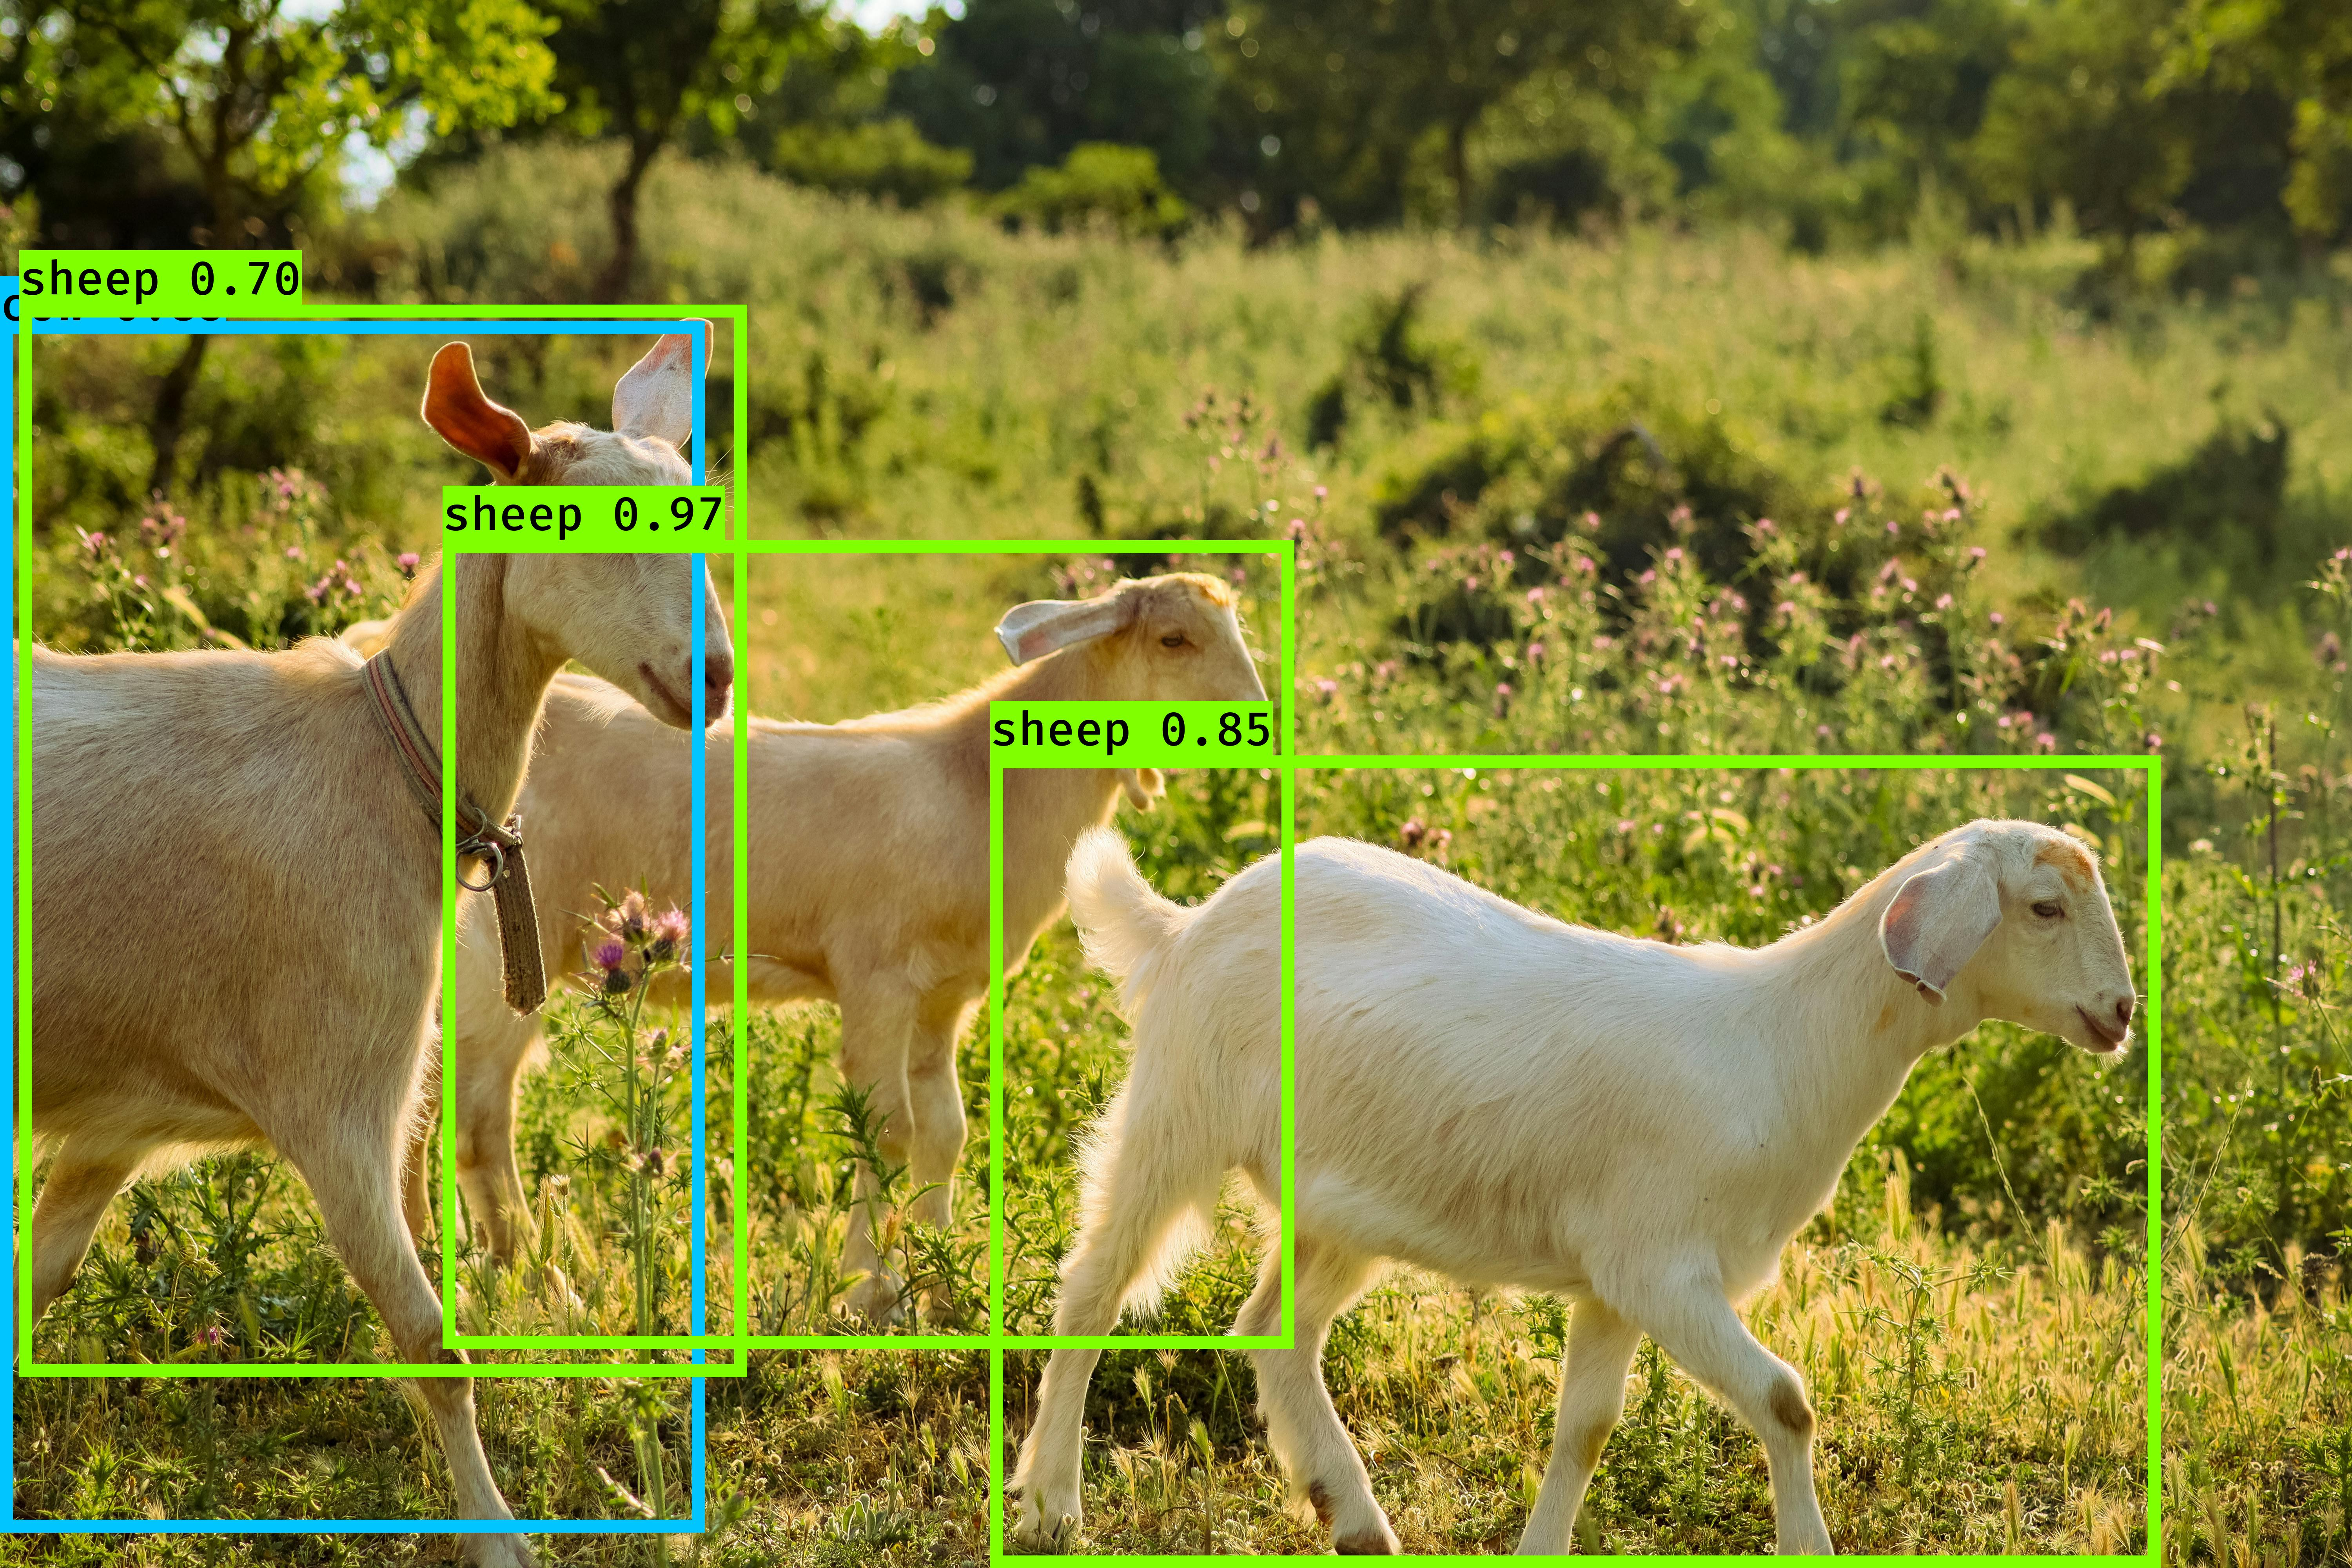

In [ ]:
# Displaying the detected image result
from IPython.display import Image
Image("/content/drive/MyDrive/SimpsonsProject/detected_image.jpg")

In [ ]:
# Running Video Detection
%cd keras-yolo3
!conda run -n ml_env python detect_headless.py model_data/yolo.h5 ../funny.mp4 ../detected_video.mp4
%cd ..


/content/drive/MyDrive/SimpsonsProject/keras-yolo3
model_data/yolo.h5 model, anchors, and classes loaded.
[INFO] Processing video: ../funny.mp4
(416, 416, 3)
Found 1 boxes for img
cat 0.96 (138, 74) (353, 365)
5.692785409000862
(416, 416, 3)
Found 1 boxes for img
cat 0.96 (137, 77) (353, 358)
1.6340541310000845
(416, 416, 3)
Found 2 boxes for img
chair 0.34 (194, 268) (357, 490)
cat 0.94 (138, 76) (352, 364)
1.5960232369998266
(416, 416, 3)
Found 2 boxes for img
chair 0.45 (195, 268) (358, 489)
cat 0.94 (136, 75) (352, 368)
1.6557522929997504
(416, 416, 3)
Found 2 boxes for img
chair 0.61 (195, 269) (357, 489)
cat 0.91 (136, 72) (352, 372)
1.58909872500044
(416, 416, 3)
Found 2 boxes for img
chair 0.55 (194, 271) (357, 491)
cat 0.95 (134, 78) (355, 371)
2.01428295200094
(416, 416, 3)
Found 2 boxes for img
chair 0.45 (192, 272) (356, 493)
cat 0.96 (133, 73) (355, 370)
2.926793164000628
(416, 416, 3)
Found 3 boxes for img
chair 0.32 (123, 68) (355, 461)
chair 0.42 (192, 271) (356, 493)
c

In [ ]:
# Problem 4: Create a file for learning

# Converting my existing Faster R-CNN style annotation file into YOLOv3 training format
import pandas as pd
import os
from sklearn.model_selection import train_test_split

# Paths
base_path = "/content/drive/MyDrive/SimpsonsProject"
old_ann_path = os.path.join(base_path, "annotation.txt")
yolo_ann_path = os.path.join(base_path, "annotation_yolo.txt")
train_path = os.path.join(base_path, "train_yolo.txt")
val_path = os.path.join(base_path, "val_yolo.txt")
classes_path = os.path.join(base_path, "classes.txt")

# Loading old annotation file
df = pd.read_csv(old_ann_path, header=None)
df.columns = ["img_path", "x1", "y1", "x2", "y2", "label"]

# Getting unique classes and assign IDs
classes = sorted(df["label"].unique())
class_to_id = {c: i for i, c in enumerate(classes)}

# Saving classes.txt
with open(classes_path, "w") as f:
    f.write("\n".join(classes))

# Converting to YOLO format
with open(yolo_ann_path, "w") as fout:
    for _, row in df.iterrows():
        fout.write(f"{row['img_path']} {row['x1']},{row['y1']},{row['x2']},{row['y2']},{class_to_id[row['label']]}\n")

# Train/Val Split
with open(yolo_ann_path) as f:
    lines = f.readlines()
train_lines, val_lines = train_test_split(lines, test_size=0.2, random_state=42)

with open(train_path, "w") as f:
    f.writelines(train_lines)
with open(val_path, "w") as f:
    f.writelines(val_lines)

print(f"[INFO] Classes saved to: {classes_path}")
print(f"[INFO] Full YOLO annotations: {yolo_ann_path}")
print(f"[INFO] Train split: {train_path} ({len(train_lines)} lines)")
print(f"[INFO] Val split: {val_path} ({len(val_lines)} lines)")

# Executing a brief preview
!head -n 5 {yolo_ann_path}
!echo "---- Classes ----"
!cat {classes_path}


[INFO] Classes saved to: /content/drive/MyDrive/SimpsonsProject/classes.txt
[INFO] Full YOLO annotations: /content/drive/MyDrive/SimpsonsProject/annotation_yolo.txt
[INFO] Train split: /content/drive/MyDrive/SimpsonsProject/train_yolo.txt (6311 lines)
[INFO] Val split: /content/drive/MyDrive/SimpsonsProject/val_yolo.txt (1578 lines)
/content/drive/MyDrive/SimpsonsProject/simpsons_dataset/abraham_grampa_simpson/pic_0000.jpg 57,72,52,72,0
/content/drive/MyDrive/SimpsonsProject/simpsons_dataset/abraham_grampa_simpson/pic_0001.jpg 80,31,337,354,0
/content/drive/MyDrive/SimpsonsProject/simpsons_dataset/abraham_grampa_simpson/pic_0002.jpg 128,48,285,407,0
/content/drive/MyDrive/SimpsonsProject/simpsons_dataset/abraham_grampa_simpson/pic_0003.jpg 72,126,158,275,0
/content/drive/MyDrive/SimpsonsProject/simpsons_dataset/abraham_grampa_simpson/pic_0004.jpg 123,61,294,416,0
---- Classes ----
abraham_grampa_simpson
apu_nahasapeemapetilon
bart_simpson
charles_montgomery_burns
chief_wiggum
comic_boo

In [37]:
# Problem 5: Confirmation that learning can be done

"""""
  Creating an auto-patcher script that modifies my train.py to:
    1. Use my prepared files instead of a random train/val split
    2. Use absolute paths for train_yolo.txt, val_yolo.txt, and classes.txt.
    3. Reduce training epochs to 2 for quick confirmation.
"""

code = """
import re

# Path to your train.py
path = "/content/drive/MyDrive/SimpsonsProject/keras-yolo3/train.py"

with open(path, "r") as f:
    code = f.read()

# --- Replace paths ---
code = re.sub(r"annotation_path\\s*=\\s*'.*?'",
              "annotation_path = '/content/drive/MyDrive/SimpsonsProject/train_yolo.txt'", code)
code = re.sub(r"classes_path\\s*=\\s*'.*?'",
              "classes_path = '/content/drive/MyDrive/SimpsonsProject/classes.txt'", code)
# Add validation path (if not present)
if "val_path" not in code:
    code = code.replace("annotation_path = '/content/drive/MyDrive/SimpsonsProject/train_yolo.txt'",
                        "annotation_path = '/content/drive/MyDrive/SimpsonsProject/train_yolo.txt'\\n    val_path = '/content/drive/MyDrive/SimpsonsProject/val_yolo.txt'")

# --- Fix val split to use file ---
code = re.sub(r"with open\\(annotation_path\\).*?lines\\s*=\\s*f\\.readlines\\(\\)",
              "with open(annotation_path) as f:\\n        train_lines = f.readlines()\\n    with open(val_path) as f:\\n        val_lines = f.readlines()",
              code, flags=re.S)

# --- Reduce epochs ---
code = re.sub(r"epochs\\s*=\\s*\\d+", "epochs=2", code)

# Save back
with open(path, "w") as f:
    f.write(code)

print("train.py patched successfully.")
"""
with open("/content/drive/MyDrive/SimpsonsProject/patch_train_script.py", "w") as f:
    f.write(code)


In [40]:
# Runing the patcher
!conda run -n ml_env python patch_train_script.py

train.py patched successfully.



In [60]:
# Modifying train.py to use 100 training images and 20 validation images

file_path = "/content/drive/MyDrive/SimpsonsProject/keras-yolo3/train.py"

with open(file_path, "r") as f:
    code = f.read()

# Replacing normal full dataset loading with limited loading
code = code.replace(
    "with open(annotation_path) as f:\n        train_lines = f.readlines()\n    with open(val_path) as f:\n        val_lines = f.readlines()",
    "with open(annotation_path) as f:\n        train_lines = f.readlines()[:100]   # Only 100 training images\n    with open(val_path) as f:\n        val_lines = f.readlines()[:20]    # Only 20 validation images"
)

with open(file_path, "w") as f:
    f.write(code)

print("train.py now limited to 100 training and 20 validation images.")


train.py now limited to 100 training and 20 validation images.


In [61]:
# Reducing batch size from 32 to 4 for faster confirmation
path = "/content/drive/MyDrive/SimpsonsProject/keras-yolo3/train.py"
with open(path) as f:
    code = f.read()

# Reducing batch size to 4
code = code.replace("batch_size = 32", "batch_size = 4")

# Adding debug print before training
if "print('>>> Starting training now...')" not in code:
    code = code.replace("model.fit_generator(",
                        "print('>>> Starting training now...')\n    model.fit_generator(")

with open(path, "w") as f:
    f.write(code)

print("train.py patched with batch_size=4 and debug print.")


train.py patched with batch_size=4 and debug print.


In [81]:
# Confirming that learning can be done
!conda run -n ml_env python /content/drive/MyDrive/SimpsonsProject/keras-yolo3/train.py

Create YOLOv3 model with 9 anchors and 18 classes.
Load weights model_data/yolo.h5.
Freeze the first 249 layers of total 252 layers.
Train on 50 samples, val on 20 samples, with batch size 4.
>>> Starting training now...
Epoch 1/2

12/12 [==============================] - 129s 11s/step - loss: 3886.9671 - val_loss: 1821.3132
Epoch 2/2

12/12 [==============================] - 123s 10s/step - loss: 957.6826 - val_loss: 598.6766

Training finished successfully! (confirmation run).

Confirmed learning can be done!.

Using TensorFlow backend.





2025-07-31 11:46:32.228163: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2025-07-31 11:46:32.233132: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2200200000 Hz
2025-07-31 11:46:32.233362: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5962e7293140 executing computations on platform Host. Devices:
2025-0

**Problem 6: (Advance assignment) Code reading**

**Important Parts of YOLOv3 [2] Paper that Corresponds to My Implementation**

1.Network Backbone: Darknet-53

* The paper, YOLOv3 [2] uses `Darknet-53 (53 convolutional layers)` as its backbone for feature extraction. It uses residual blocks and batch normalization.

* This corresponds to `def yolo_body(inputs, num_anchors, num_classes)` function in my `yolo3/model.py` that builds YOLOv3 model based on `Darknet-53 layers` by calling `DarknetConv2D_BN_Leaky()`.

2.Detection at Three Scales
* YOLOv3 [2] predicts at three feature map scales `(13×13, 26×26, 52×52)` for small, medium, and large objects, thereby improving small-object detection.

* This corresponds to `yolo_body()` function in my `yolo3/model.py` that offers three outputs connected to three detection heads (yolo_head()):

  * `y1 = yolo_head(f1, anchors[6:], num_classes, input_shape)`
  * `y2 = yolo_head(f2, anchors[3:6], num_classes, input_shape)`
  * `y3 = yolo_head(f3, anchors[0:3], num_classes, input_shape)`

3.Bounding Box Encoding & Decoding
* YOLOv3 [2] paper utilizes logistic regression for objectness and class probabilities, adjusting coordinates relative to anchor boxes.

* In my code, this is implemented by `yolo_head(feats, anchors, num_classes, input_shape)` and `yolo_correct_boxes()` functions in `yolo3/model.py` that convert network output into box predictions, objectness, and class scores; and convert predicted box coordinates to actual image coordinates, alternatively.



4. Anchor Boxes
* YOLOv3 [2] employs 9 predefined anchors grouped into 3 scales.

* In my implementation, this is realized by `model_data/yolo_anchors.txt` and `get_anchors()` function in `train.py` that loads anchor sizes and reshapes them for detection heads.


5.Loss Function
* The paper combines coordinate loss, objectness loss, and classification loss.

* In my implementation, this corresponds to the `yolo_loss()` function in `yolo3/model.py` that performs IoU calculations, ignore mask, and combines different loss components:
  * xy_loss = ...
  * wh_loss = ...
  * confidence_loss = ...
  * class_loss = ...
  * loss = xy_loss + wh_loss + confidence_loss + class_loss

6. Non-Max Suppression (NMS)
* YOLOv3 [2] suppresses duplicate overlapping boxes with high IoU.

* In my code, this corresponds to `yolo_eval()` function in `yolo3/model.py` that calls `tf.image.non_max_suppression()`. Utilized during inference `(yolo_video.py, predict.py)`.

7.Transfer Learning with Pretrained Weights
* YOLOv3 [2] trains on COCO dataset, then fine-tunes on custom dataset.

* This corresponds to the following lines of code in train.py of my implementation that loads pretrained backbone and freezes initial layers for fine-tuning.

`if load_pretrained:`

        model_body.load_weights(weights_path, by_name=True,
        skip_mismatch=True)
        print('Load weights {}.'.format(weights_path))
        if freeze_body in [1, 2]:
            num = (185, len(model_body.layers)-3)[freeze_body-1]
            for i in range(num):
                model_body.layers[i].trainable = False
            print('Freeze the first {} layers of total {} layers.'.format(num, len(model_body.layers)))`


8.Data Augmentation
* YOLOv3 [2] employs image resizing, flipping, and color distortions to improve generalization.

* This is accomplished in my implementation through the `get_random_data()` function in `yolo3/utils.py` that does image resize, flip, hue, saturation, and brightness augmentation on training images.
